
<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>

In this tutorial, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network. Then, we try a more challenging which is called "horses or humans"


## Import Keras and Packages

---



Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.

In [2]:
from tensorflow.keras.layers import Conv2D # to add convolutional layers
from tensorflow.keras.layers import MaxPooling2D # to add pooling layers
from tensorflow.keras.layers import Flatten # to flatten data for fully connected layers

<a id='item42'></a>

## Convolutional Layer with One set of convolutional and pooling layers

In [3]:
# import data
from keras.datasets import mnist
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [4]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
print(X_train[0].shape)
print(X_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


Let's normalize the pixel values to be between 0 and 1

In [5]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.

In [7]:

# create model
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               230500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
_________________________________________________________________


We can also define a sequential model, like this:

In [ ]:
# create model
model=Sequential([
                  Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='relu',input_shape=(28,28,1)),
                  MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                  Flatten(),
                  Dense(100, activation='relu'),
                  Dense(num_classes, activation='softmax')])

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               230500    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1010      
Total params: 231,926
Trainable params: 231,926
Non-trainable params: 0
_________________________________________________________________


Let's apply padding and see the diffrence:

In [ ]:

# create model
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()


You already know how to apply softmax, tanh, sigmoid, linear and relu as activation of layer by setting:
activation='softmax', activation='tanh' , activation='sigmoid', activation='linear', activation='relu'

But what if we need to use Leaky Relu or PRelu? can we do it in the same way by setting:
activation='leaky relu', activation='PRelu' ?

No! 

So let's see how to do it:

In [ ]:
# create model
from keras.layers import LeakyReLU, PReLU

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),strides=(1,1),activation='linear',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='linear'))
model.add(PReLU())
model.add(Dense(num_classes, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               230500    
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

You heard in this course about Xavier initializing and how it can make an improvement in deep neural networks. Xavier initializer is also known as Glorot normal initializer. Actually, Keras uses Glorot uniform initializer as a default choice. You can see more details about initializers [here](https://keras.io/initializers/)


In [ ]:
# create model
from keras.layers import LeakyReLU, PReLU
from keras.initializers import glorot_normal
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',strides=(1,1),activation='linear',kernel_initializer=glorot_normal() ,bias_initializer=glorot_normal(),input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='linear',kernel_initializer=glorot_normal() ,bias_initializer=glorot_normal()))
model.add(PReLU())
model.add(Dense(num_classes, activation='softmax',kernel_initializer=glorot_normal(),bias_initializer=glorot_normal()))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               313700    
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 100)               100       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

Finally, let's call the function to create the model, and then let's train it and evaluate it.

In [8]:

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2759 - accuracy: 0.9233 - val_loss: 0.0974 - val_accuracy: 0.9706
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0804 - accuracy: 0.9770 - val_loss: 0.0610 - val_accuracy: 0.9809
Epoch 3/10
300/300 [==============================] - 3s 12ms/step - loss: 0.0553 - accuracy: 0.9841 - val_loss: 0.0503 - val_accuracy: 0.9841
Epoch 4/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.0459 - val_accuracy: 0.9844
Epoch 5/10
300/300 [==============================] - 3s 12ms/step - loss: 0.0346 - accuracy: 0.9900 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 6/10
300/300 [==============================] - 4s 12ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 7/10
300/300 [==============================] - 3s 12ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0391 - val_accuracy: 0.9865

Again we can see the model weights and biases like before:

In [9]:
layers=model.layers
num_of_layers=len(layers)
print(num_of_layers)
print(layers)
print(layers[0].weights)


5
[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fbba9cb9dc0>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fbba9ca10a0>, <tensorflow.python.keras.layers.core.Flatten object at 0x7fbba9449070>, <tensorflow.python.keras.layers.core.Dense object at 0x7fbba9c89dc0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fbba6e4de50>]
[<tf.Variable 'conv2d/kernel:0' shape=(5, 5, 1, 16) dtype=float32, numpy=
array([[[[-0.07461175, -0.252318  , -0.13617927,  0.07819529,
           0.04836806, -0.05310736, -0.05630418,  0.02040611,
           0.20067607, -0.0640454 , -0.13580304, -0.05580524,
          -0.09562593, -0.14095563, -0.27337986, -0.07827242]],

        [[-0.00136807, -0.33195084, -0.00438182, -0.15852387,
          -0.11258525,  0.14912878, -0.10081299, -0.06396227,
           0.23278882,  0.05661998, -0.16909082,  0.04257084,
          -0.02858725, -0.38510805, -0.1078527 , -0.15185775]],

        [[-0.00689357, -0.36309782,  0.16383246, 

##Activation map visualization visualization

For CNNs, it is common to visualize outputs of each layer. It helps us to figure out what each filter does on the input images, or in other words, what each filters try to see. There are several ways to do it, here we define another model to help us visualize outputs of our model. 

In [10]:
layer_outputs=[]
for i in range(num_of_layers):
  Layer=model.layers[i]
  layer_outputs.append(Layer.output)
print(layer_outputs)

from tensorflow.keras import models

activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activation_model.summary()

[<tf.Tensor 'conv2d/Identity:0' shape=(None, 24, 24, 16) dtype=float32>, <tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 12, 12, 16) dtype=float32>, <tf.Tensor 'flatten/Identity:0' shape=(None, 2304) dtype=float32>, <tf.Tensor 'dense/Identity:0' shape=(None, 100) dtype=float32>, <tf.Tensor 'dense_1/Identity:0' shape=(None, 10) dtype=float32>]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
___________________________________________

Now let's see what's the difference between the new model and the model we previously had:

In [11]:
out=model.predict(X_test[0].reshape(1, 28, 28, 1))
print(out)
out=activation_model.predict(X_test[0].reshape(1, 28, 28, 1))
print(out)

[[2.5643325e-09 1.6099884e-09 8.4245693e-07 1.5945890e-05 1.2179092e-10
  1.6667917e-09 1.3013703e-14 9.9998188e-01 1.2033215e-07 1.2024409e-06]]
[array([[[[0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.00264487,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.

As you can see, the first model just predicts final output of the network, in this case that is 10 probabilities for our 10 classes, but the output of the second model, seems a bit messy! let's have a closer look to this output

In [12]:
print(len(out))
print(type(out))

5
<class 'list'>


So, it seems we have a python list which has 7 elements. Now, as you can guess, our network had 7 layers and this list has 7 elements. It seems the second network has captured outputs for all layers, not only the final one. Let's see type and shape of the first element to make sure:

In [13]:
print(type(out[0]))
print(out[0].shape)

<class 'numpy.ndarray'>
(1, 24, 24, 16)


And there you go! We got a numpy array which seems to match what we expected as output of the first convolution layer! Now we can plot output of first filter:

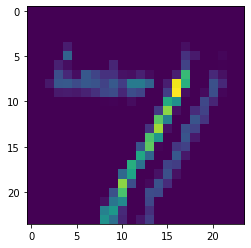

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
img=out[0][0,:,:,0]
plt.imshow(img)

/bin/bash: y: command not found


Now, it's easy to see all 16 filters together!

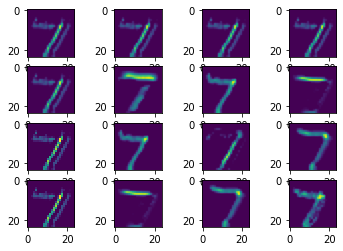

In [15]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(4,4)
for i in range(4):
  for j in range(4):
    axarr[i,j].imshow(out[0][0,:,:,i*j])

Now it's time to solve a more challenging problem which is much closer to real life examples. 

At first, we need to download the dataset:

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip 

--2020-05-09 03:18:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  85.5MB/s    in 1.7s    

2020-05-09 03:18:46 (85.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
!unzip horse-or-human.zip

Archive:  horse-or-human.zip
  inflating: horses/horse01-0.png    
  inflating: horses/horse01-1.png    
  inflating: horses/horse01-2.png    
  inflating: horses/horse01-3.png    
  inflating: horses/horse01-4.png    
  inflating: horses/horse01-5.png    
  inflating: horses/horse01-6.png    
  inflating: horses/horse01-7.png    
  inflating: horses/horse01-8.png    
  inflating: horses/horse01-9.png    
  inflating: horses/horse02-0.png    
  inflating: horses/horse02-1.png    
  inflating: horses/horse02-2.png    
  inflating: horses/horse02-3.png    
  inflating: horses/horse02-4.png    
  inflating: horses/horse02-5.png    
  inflating: horses/horse02-6.png    
  inflating: horses/horse02-7.png    
  inflating: horses/horse02-8.png    
  inflating: horses/horse02-9.png    
  inflating: horses/horse03-0.png    
  inflating: horses/horse03-1.png    
  inflating: horses/horse03-2.png    
  inflating: horses/horse03-3.png    
  inflating: horses/horse03-4.png    
  inflating: horses/h

As you can see, here we don't have any labels. We have almost raw data. Now in order to train with keras, we need to make some directories and sub-directories.  

In [ ]:
!mkdir Train
!mkdir Train/horses
!mkdir Train/humans
!mkdir Val
!mkdir Val/horses
!mkdir Val/humans

Here, we need to write a python code to give us a list of images names in each sub-directories. It is hard to do something like this by hand. OS is a library which can help us to see what is in a special directory. 

In [ ]:
import os
path1="/content/horses/"
path2="/content/humans/"
horses_names=os.listdir(path1)
human_names=os.listdir(path2)
print(len(horses_names))
print(horses_names[0:10])
print(len(human_names))
print(human_names[0:10])

500
['horse43-0.png', 'horse27-2.png', 'horse21-4.png', 'horse11-7.png', 'horse34-5.png', 'horse03-6.png', 'horse33-7.png', 'horse01-5.png', 'horse46-0.png', 'horse34-7.png']
527
['human10-08.png', 'human11-06.png', 'human07-01.png', 'human09-21.png', 'human17-30.png', 'human03-11.png', 'human08-19.png', 'human01-16.png', 'human07-07.png', 'human11-16.png']


In [ ]:
path2+human_names[0]

'/content/humans/human10-08.png'

We can plot some of images as examples to see what is in this dataset:

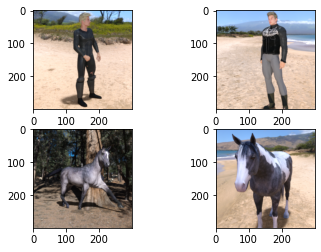

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
f, axarr = plt.subplots(2,2)
img1=(cv2.imread(path2+human_names[0]))
img2=(cv2.imread(path2+human_names[1]))
img3=(cv2.imread(path1+horses_names[0]))
img4=(cv2.imread(path1+horses_names[1]))

img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img4=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)

axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[1,0].imshow(img3)
axarr[1,1].imshow(img4)

It's time to write another python code to split data into train and validation and move them to sub-directories. 

In [ ]:
import shutil
train_rate=0.7

train_num_horses=int(train_rate*len(horses_names))
train_num_humans=int(train_rate*len(human_names))

for i in range(len(horses_names)):
  if i<train_num_horses:
    shutil.move('horses/'+horses_names[i],'Train/horses/'+horses_names[i])
  else:
    shutil.move('horses/'+horses_names[i],'Val/horses/'+horses_names[i])

for i in range(len(human_names)):
  if i<train_num_humans:
    shutil.move('humans/'+human_names[i],'Train/humans/'+human_names[i])
  else:
    shutil.move('humans/'+human_names[i],'Val/humans/'+human_names[i])
  

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [ ]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        3

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
)
train_batch=128
val_batch  =32
# Flow training images in batches of 128 using train_datagen generator
train_generator = datagen.flow_from_directory(
        'Train/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=train_batch,
        # Since we use binary_crossentropy loss, we need binary labels. In case of categorical we can set class_mode='categorical'
        class_mode='binary') 
# Flow training images in batches of 128 using train_datagen generator
val_generator = datagen.flow_from_directory(
        'Val/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=val_batch,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary') 


Found 718 images belonging to 2 classes.
Found 309 images belonging to 2 classes.


### Training
Let's train for 8 epochs -- this may take a few minutes to run.

Do note the values per epoch.

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. 

In [ ]:
history = model.fit(
      train_generator,
      validation_data  = val_generator, 
      epochs=1,
      verbose=1)

      2/Unknown - 0s 110ms/step - loss: 3.2866 - acc: 0.5156

KeyboardInterrupt: ignored

Let's add more argument to fix this problem:

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data  = val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=2,
      verbose=1)

Epoch 1/2
5/5 [==============================] - 20s 4s/step - loss: 0.6983 - acc: 0.4542 - val_loss: 0.6892 - val_acc: 0.5243
Epoch 2/2
5/5 [==============================] - 19s 4s/step - loss: 0.6937 - acc: 0.5237 - val_loss: 0.6865 - val_acc: 0.5243


We can upload new images and do some predictions:

In [ ]:
import cv2
img=cv2.imread('/content/test1.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(300,300))
img=img/255
print(img.shape)
img=np.expand_dims(img, axis=0)
print(img.shape)
score=model.predict(img)
print(score)

(300, 300, 3)
(1, 300, 300, 3)
[[0.55168146]]


But how do we know that 0 is for horse or human? 
here is how we can see class labels:

In [ ]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

It is also possible to do predictions on multiple images.

In [ ]:
import cv2
test_images_names=['/content/test1.jpg','/content/test2.jpg','/content/test3.jpeg']
for i in (test_images_names):
  img=cv2.imread(i)
  print(img.shape)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=cv2.resize(img,(300,300))
  img=img/255
  img=np.expand_dims(img, axis=0)
  score=model.predict(img)
  print(score)



(667, 1000, 3)
[[0.55168146]]
(746, 500, 3)
[[0.54219]]
(1219, 1826, 3)
[[0.57529765]]


##Callbacks

Callbacks in keras are really usefull. These functions act at the end of each epoch. We can use ModelCheckpoint callback to save the model after each epoch. EarlyStopping callback is another callback function which stops the model if validation error is not changing. You can check and discover more callback functions [here](https://keras.io/callbacks/)

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
cl1=EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0)
cl2=ModelCheckpoint('backup/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, period=1)
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data  = val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=2,
      verbose=1,
      callbacks=[cl1,cl2])

NameError: name 'train_generator' is not defined

We can resume the training from the last checkpoint by simply loading the model:

In [ ]:
from tensorflow.keras.models import load_model
Model=load_model('/content/backup/weights.02-0.69.hdf5')
history = Model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data  = val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=2,
      verbose=1,
      callbacks=[cl1,cl2])

Epoch 1/2
5/5 [==============================] - 19s 4s/step - loss: 0.6782 - acc: 0.5983 - val_loss: 0.6262 - val_acc: 0.7257
Epoch 2/2
5/5 [==============================] - 19s 4s/step - loss: 0.7779 - acc: 0.5305 - val_loss: 0.6880 - val_acc: 0.6493


##Transfer Learning

**Load the pre-trained model**


First, we will load a VGG model trained on imagenet dataset

In [ ]:
from keras.applications import VGG16
#Load the VGG model

vgg_conv = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

553467904/553467096 [==============================] - 16s 0us/step


Let's have a look at this architecture:

In [ ]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Now let's set include_top to false and see what happens:

In [ ]:
from keras.applications import VGG16
#Load the VGG model

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

58892288/58889256 [==============================] - 2s 0us/step


Let's have a look at this architecture:

In [ ]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

**Freeze the required layers**
In Keras, each layer has a parameter called “trainable”. For freezing the weights of a particular layer, we should set this parameter to False, indicating that this layer should not be trained. That’s it! We go over each layer and select which layers we want to train.

In [ ]:

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7fae62442978> False
<keras.layers.convolutional.Conv2D object at 0x7fae624429b0> False
<keras.layers.convolutional.Conv2D object at 0x7fae62442d30> False
<keras.layers.pooling.MaxPooling2D object at 0x7fae6245f518> False
<keras.layers.convolutional.Conv2D object at 0x7fae6245f358> False
<keras.layers.convolutional.Conv2D object at 0x7fae6245ff60> False
<keras.layers.pooling.MaxPooling2D object at 0x7fae6245bbe0> False
<keras.layers.convolutional.Conv2D object at 0x7fae6245ba20> False
<keras.layers.convolutional.Conv2D object at 0x7fae62469710> False
<keras.layers.convolutional.Conv2D object at 0x7fae6246e2e8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fae6246ed30> False
<keras.layers.convolutional.Conv2D object at 0x7fae6246eb70> False
<keras.layers.convolutional.Conv2D object at 0x7fae624755f8> False
<keras.layers.convolutional.Conv2D object at 0x7fae621cf438> False
<keras.layers.pooling.MaxPooling2D object at 0x7fae621cfe80>

**Create a new model**
Now that we have set the trainable parameters of our base network, we would like to add a classifier on top of the convolutional base. We will simply add a fully connected layer followed by a softmax layer with 3 outputs. This is done as given below.

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
# Create the model

model = models.Sequential()
# Add the vgg convolutional base model

model.add(vgg_conv)
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              42468352  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 57,184,065
Trainable params: 49,548,801
Non-trainable params: 7,635,264
_________________________________________________________________


Now you can start the training just like before!

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data  = val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=2,
      verbose=1)

Epoch 1/2
5/5 [==============================] - 38s 8s/step - loss: 3126.3009 - acc: 0.5017 - val_loss: 2.2147 - val_acc: 0.5139
Epoch 2/2
5/5 [==============================] - 23s 5s/step - loss: 1.1666 - acc: 0.4898 - val_loss: 6.7570 - val_acc: 0.4729


We can also import other trained models:

In [ ]:
import tensorflow as tf
import keras
res1=keras.applications.resnet.ResNet50(include_top=False, weights='imagenet')
res2=keras.applications.resnet.ResNet50(include_top=True, weights='imagenet')


102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
res1.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
res2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

##Regularization

It seems like our model has too many parameters and it will result in an overfit. In order to fix this, we can use reglarization techniques. Drop out is a very common method to handle the overfitting problem. L2 and L1 regularization can also be used but not very common in CNNs. 

In [ ]:
from keras.layers import Dropout
from keras.regularizers import l1
from keras.regularizers import l2

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
# Create the model

model = models.Sequential()
# Add the vgg convolutional base model

model.add(vgg_conv)
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=l2))
model.add(Dropout(rate=0.3))
model.add(layers.Dense(1, activation='sigmoid'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 9, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              42468352  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 57,184,065
Trainable params: 49,548,801
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_batch,
      validation_data  = val_generator, 
      validation_steps=val_generator.samples//val_batch,
      epochs=2,
      verbose=1)

Epoch 1/2
5/5 [==============================] - 24s 5s/step - loss: 190.0418 - acc: 0.4831 - val_loss: 0.7189 - val_acc: 0.4896
Epoch 2/2
5/5 [==============================] - 23s 5s/step - loss: 0.6964 - acc: 0.5188 - val_loss: 0.6901 - val_acc: 0.6029


### Thank you for completing this lab!
